#### Load packages

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import torch
import pandas as pd

#### Inspect data directory

In [3]:
testpath="/datasets/ee285f-public/airbus_ship_detection/"
datasets=os.listdir(testpath)
datasets=[testpath+s for s in datasets]
print(*datasets[:],sep='\n')

/datasets/ee285f-public/airbus_ship_detection/test_v2
/datasets/ee285f-public/airbus_ship_detection/upload.sh
/datasets/ee285f-public/airbus_ship_detection/.all.zip.C66tss
/datasets/ee285f-public/airbus_ship_detection/train_v2
/datasets/ee285f-public/airbus_ship_detection/.all.zip.Lz541s
/datasets/ee285f-public/airbus_ship_detection/sample_submission_v2.csv
/datasets/ee285f-public/airbus_ship_detection/train_ship_segmentations_v2.csv


#### Inspect image dataset

In [4]:
path=testpath+'train_v2'
train=os.listdir(path)
train=[path+'/'+s for s in train]
print('{:,.0f}'.format(len(train)),'images\n')
print(*train[:10],sep='\n')

192,556 images

/datasets/ee285f-public/airbus_ship_detection/train_v2/cc59461a9.jpg
/datasets/ee285f-public/airbus_ship_detection/train_v2/c94a2d8b6.jpg
/datasets/ee285f-public/airbus_ship_detection/train_v2/679612621.jpg
/datasets/ee285f-public/airbus_ship_detection/train_v2/a1bf2fd9a.jpg
/datasets/ee285f-public/airbus_ship_detection/train_v2/5a66ce24f.jpg
/datasets/ee285f-public/airbus_ship_detection/train_v2/59e1cac7a.jpg
/datasets/ee285f-public/airbus_ship_detection/train_v2/2d8185ee0.jpg
/datasets/ee285f-public/airbus_ship_detection/train_v2/17c6770ed.jpg
/datasets/ee285f-public/airbus_ship_detection/train_v2/f4e9df9b7.jpg
/datasets/ee285f-public/airbus_ship_detection/train_v2/de07f757a.jpg


#### Number of Data entries

In [9]:
y_train=pd.read_csv(testpath+'sample_submission_v2.csv',)
print('{:,.0f} entries\n'.format(y_train.size))
print(y_train.head(),'\n')

index=np.where(y_train['ImageId']=='00023d5fc.jpg')[0]
if len(index)==0:
    print('Image not found!')
else:
    print('Image found! Index =',index,'\n')
    print(y_train.head())

31,212 entries

         ImageId EncodedPixels
0  00002bd58.jpg           1 2
1  00015efb6.jpg           1 2
2  00023d5fc.jpg           1 2
3  000367c13.jpg           1 2
4  0008ca6e9.jpg           1 2 

Image found! Index = [2] 

         ImageId EncodedPixels
0  00002bd58.jpg           1 2
1  00015efb6.jpg           1 2
2  00023d5fc.jpg           1 2
3  000367c13.jpg           1 2
4  0008ca6e9.jpg           1 2


|Data|Number of samples|
|---|---|
|test_v2|15,606|
|train_v2|192,556|
|sample_submission_v2.csv|31,212|
|train_ship_segmentations_v2.csv|463,446|

#### View Image Channels

cc59461a9.jpg


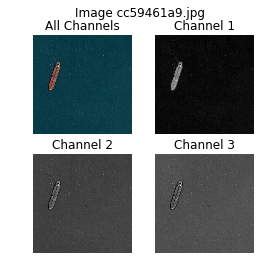

In [10]:
i=0
img = mpimg.imread(train[i])
print(train[i].rsplit('/', 1)[-1])
n=2
fig,ax=plt.subplots(n,n)
fig.set_figwidth(4)
fig.suptitle('Image '+train[i].rsplit('/', 1)[-1])
ax[0,0].set_title('All Channels')
ax[0,0].imshow(img)
ax[0,0].axis('off')
ax[0,1].set_title('Channel 1')
ax[0,1].imshow(img[:,:,0],cmap='gray')
ax[0,1].axis('off')
ax[1,0].set_title('Channel 2')
ax[1,0].imshow(img[:,:,1],cmap='gray')
ax[1,0].axis('off')
ax[1,1].set_title('Channel 3')
ax[1,1].imshow(img[:,:,2],cmap='gray')
ax[1,1].axis('off')

plt.show()

#### View Images

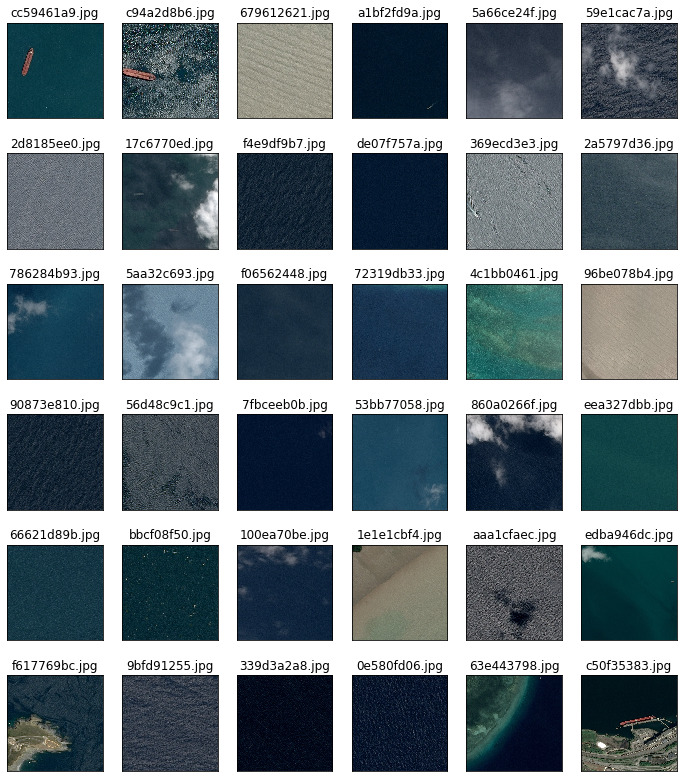

In [11]:
n=6
z=0
fig, axes = plt.subplots(n,n)
fig.set_figwidth(12)
fig.set_figheight(14)
for i in np.arange(n**2):
    k=int(i/n)
    l=i%n
    axes[k,l].set_title(train[i+z*n**2].rsplit('/', 1)[-1])
    axes[k,l].imshow(mpimg.imread(train[i+z*n**2]))
    axes[k,l].get_xaxis().set_visible(False)
    axes[k,l].get_yaxis().set_visible(False)
plt.show()

#### Convert image to torch tensor

In [12]:
img=mpimg.imread(train[0])
print(img.shape)
print(type(img))
imgt=torch.from_numpy(img)
print(imgt.shape)

(768, 768, 3)
<class 'numpy.ndarray'>
torch.Size([768, 768, 3])
